# 손글씨 숫자 예측 by MLP

In [1]:
# MNIST 데이터 로드
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 458kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.49MB/s]


In [8]:
print(len(train_data), len(test_data))
print(train_data.data.shape)

60000 10000
torch.Size([60000, 28, 28])


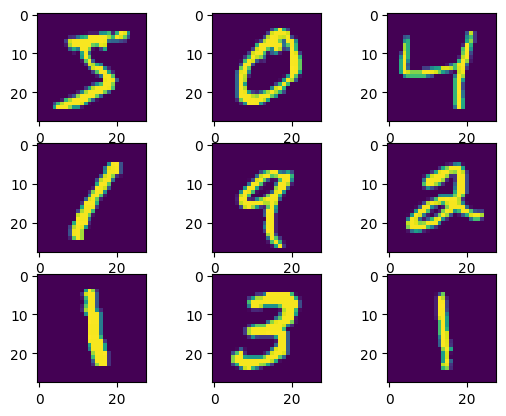

In [3]:
# 로드한 데이터 시각화
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_data.data[i])

plt.show()

In [4]:
# 배치 처리를 위한 DataLoader
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [5]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
# MLP 모델 생성
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [9]:
# 학습
learning_rate = 1e-3
optim = Adam(model.parameters(), lr=learning_rate)

for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()
    data = torch.reshape(data, (-1, 784)).to(device)
    preds = model(data)

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

  print(f"Epoch {epoch + 1} | loss: {loss.item():.4f}")

Epoch 1 | loss: 0.0689
Epoch 2 | loss: 0.0252
Epoch 3 | loss: 0.0202
Epoch 4 | loss: 0.2207
Epoch 5 | loss: 0.0424
Epoch 6 | loss: 0.0104
Epoch 7 | loss: 0.0440
Epoch 8 | loss: 0.0018
Epoch 9 | loss: 0.0049
Epoch 10 | loss: 0.0149
Epoch 11 | loss: 0.0391
Epoch 12 | loss: 0.0068
Epoch 13 | loss: 0.0416
Epoch 14 | loss: 0.0033
Epoch 15 | loss: 0.0094
Epoch 16 | loss: 0.1804
Epoch 17 | loss: 0.0079
Epoch 18 | loss: 0.0001
Epoch 19 | loss: 0.0227
Epoch 20 | loss: 0.0001


In [10]:
# 모델의 가중치 저장
torch.save(model.state_dict(), "MNIST.pt")

In [11]:
# 모델 로드 및 예측/평가
model.load_state_dict(torch.load("MNIST.pt", map_location=device))

correct = 0

with torch.no_grad():
  for data, label in test_loader:
    data = torch.reshape(data, (-1, 784)).to(device)

    output = model(data.to(device))
    preds = output.data.max(1)[1]

    corr = preds.eq(label.to(device).data).sum().item()
    correct += corr

  print(f"Accuracy: {correct / len(test_data)}")

Accuracy: 0.975
